In [1]:
# DATS 6103 – Individual Project 1 - Max Grossman
    # Description: Describe top 15 countries' military spending as compared between 
    #             countries and other indicators of interest (specifically gdp & population)
    # Data Source: World Bank DataBank and SIPRI via World Bank DataBank

In [180]:
### Dependencies ###
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np
import os

# allow for inline plots
%matplotlib inline

### Set to correct working directory ###

# if data folder not in current directory, ask user to provide
if("/mili_data" in [x[0].split('militaries')[1] for x in os.walk(os.getcwd())]):
    pass
else:
    neededDirectory = input("Provide directory with data: ")
    os.chdir(neededDirectory)

In [181]:
### Step 1: Clean and Organize the datasets ###

# The code below completes the following steps
    # 1. read in data
    # 2. group in list
    # 3. remove uneeded columns and rename year columns
    # 4. subset dataframes in list to only top 15 countries in terms of military spending 
    # 5. subset dataframes to only include columns 2007 to 2015
    
    
# 1. read in data from /mili_data folder
militarySpending = pd.read_csv("mili_data/militarySpending.csv",delimiter='\t')
population = pd.read_csv ("mili_data/population.csv")
gdpUSD = pd.read_csv('mili_data/gdp_usd.csv')

In [182]:
# 2. add dataframes to list
miliDataList = [militarySpending,population,gdpUSD]

In [183]:
# 3. clean dataframes

#use for loop to remove specific column names in population and militarySpending
for i in range(0,len(miliDataList)):
    
    #set index to Country Codes
    miliDataList[i] = miliDataList[i].set_index('Country Name')
    miliDataList[i].index.name = None
    miliDataList[i] = miliDataList[i].sort_index(axis=1)
    
    #convert militarySpending to float, also set militarySpending ix names equal to those in population and gdpUSD
    if(i==0):
        
        miliDataList[i] = miliDataList[i].rename(index = {
            "USA":"United States",
            "China, P.R.":"China",
            "USSR/Russia":"Russian Federation",
            "UK": "United Kingdom",
            "Korea, South":"Korea, Rep."
        })
        
    if(i>0):
    
        #generate seriesCode, a list of column names that include the word series as well as "Country Code"
        seriesCode = [s for s in list(miliDataList[i]) if "Series".lower() in s.lower()]
        seriesCode.extend([s for s in list(miliDataList[i]) if "Country".lower() in s.lower()])

        #drop columns in seriesCode list
        miliDataList[i] = miliDataList[i].drop(seriesCode,axis=1)
    
        #generate newColumns, list with 'Country Name' and column names w/o [YR####] text provided in original dataset 
        newColumns = [s.split(" [")[0] for s in list(miliDataList[i]) if "YR".lower() in s.lower()]
    
        #set current data frame columns to those in newColumns
        miliDataList[i].columns = newColumns
            
    #covert all string place holders and NaNs to zero
    miliDataList[i] = miliDataList[i].replace(". .",0)
    miliDataList[i] = miliDataList[i].replace("..",0)
    miliDataList[i] = miliDataList[i].replace("NaN",0)
    miliDataList[i] = miliDataList[i].fillna(0)
    miliDataList[i] = miliDataList[i].replace("xxx",0)
    miliDataList[i] = miliDataList[i].replace("",0)
      
    #make sure all dataframes have values of type float
    miliDataList[i] = miliDataList[i].astype(float)
    
    #make militarySpending dataframe in billions denomination, also grab top 15 military spenders in 2015
    if(i==0):
        miliDataList[i] = miliDataList[i] * 1000000
        top15mili = miliDataList[0].sort_values('2015',ascending=False)[0:11].index.values.tolist()

    #subset dataframes to include only top 15 military spenders and years 2007 to 2015
    miliDataList[i] = miliDataList[i].loc[top15mili,"2007":'2015'] 


In [184]:
### Step 2: Generate desired indicators ###

# Indicators to generate are:
    # Military Spending compared to country's GDP
    # Country's Military Spending compared to spending of all countries
    # Per person mili spending v. per person gdp

# Generating these indicators is done via the following steps
    # 1. Generate Dataframe for each indicator and append to new list
    # 2. plot each indicator
# first convert militarySpending, currently in millions of dollars, to true values 
#    

In [185]:
# 1. Generate Dataframe for each indicator and append to new list

# military spending compared to country's gdp
miliDataList.append(miliDataList[0]/miliDataList[2])
# military spending compared to total spending of all other countries
miliDataList.append(miliDataList[0]/miliDataList[0].sum(axis=0))
# per person military spending v. per person gdp
miliDataList.extend([miliDataList[0]/miliDataList[1],miliDataList[2]/miliDataList[1]])

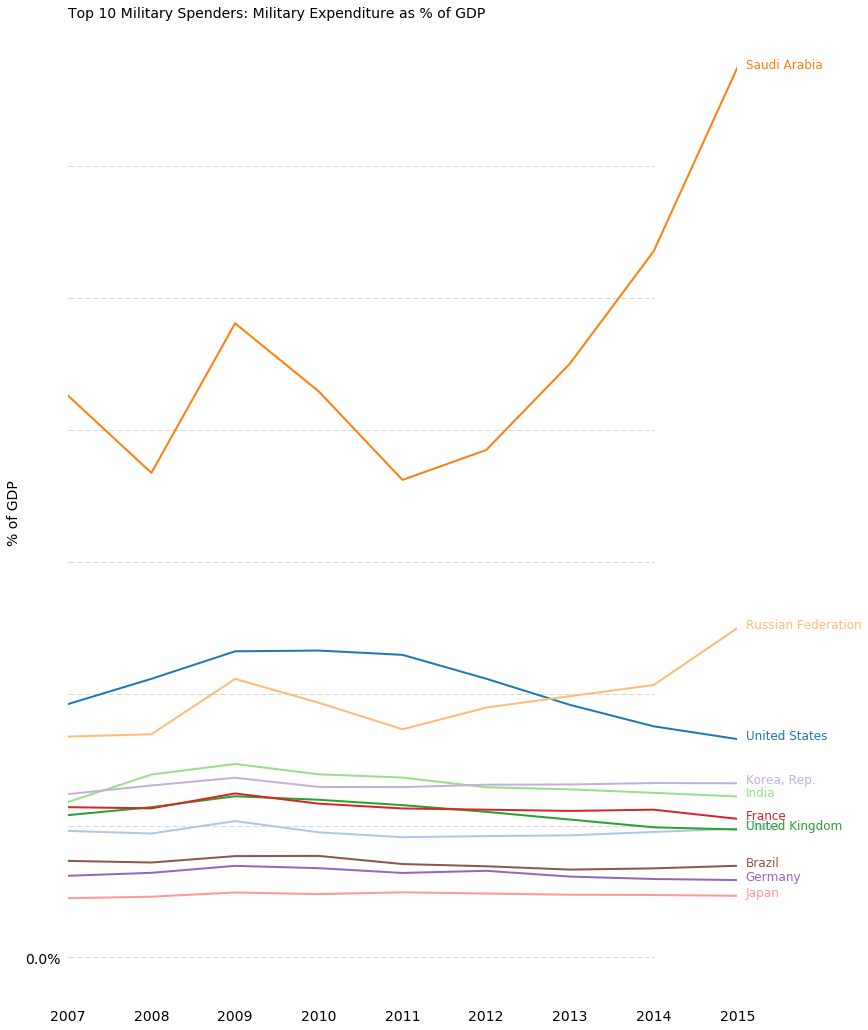

In [344]:
#2 . Plot each indicator

# tableau20 colors for plots, found from this post -> bit.ly/1uBkJI5
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]  

for i in range(len(tableau20)):
    r,g,b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

# military expenditure as % of GDP

#plot transpose of this dataframe, using tableua20 colors
#miliDataList[3].T.plot(figsize=(12,14),color=tableau20)
pp.figure(figsize=(12,18))
ax = pp.subplot(111)
# remove outer lines of plot
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
# add stylistic ticks across the plot
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()    
pp.xlim(2007,2015)
plt.yticks([y * 0.1 for y in range(0,14,2)], 
           [str(x) + "%" for x in [y * 0.01 for y in range(0,14,2)]], fontsize=14)    
pp.xticks(fontsize=14)
for y in [y * 0.01 for y in range(0,14,2)]:
    pp.plot(range(2007, 2015), [y] * len(range(2007, 2015)), "--", lw=0.5, color="black", alpha=0.3)    
pp.tick_params(axis="both", which="both", bottom="off", top="off",    
                labelbottom="on", left="off", right="off", labelleft="on")  

for i in range(0,len(miliDataList[3].index.values.tolist())):
    # Plot each line separately with its own color, using the Tableau 20    
    # color set in order.    
    country = miliDataList[3].index.values.tolist()[i]
    pp.plot(miliDataList[3].loc[country],
           lw=2,color=tableau20[i])
    y_pos = miliDataList[3].loc[country,'2015']
    pp.text(2015.1,y_pos,country,fontsize=12,color=tableau20[i])
pp.ylabel('% of GDP',size=14)
pp.title('Top 10 Military Spenders: Military Expenditure as % of GDP',
         fontsize=14,loc='left')


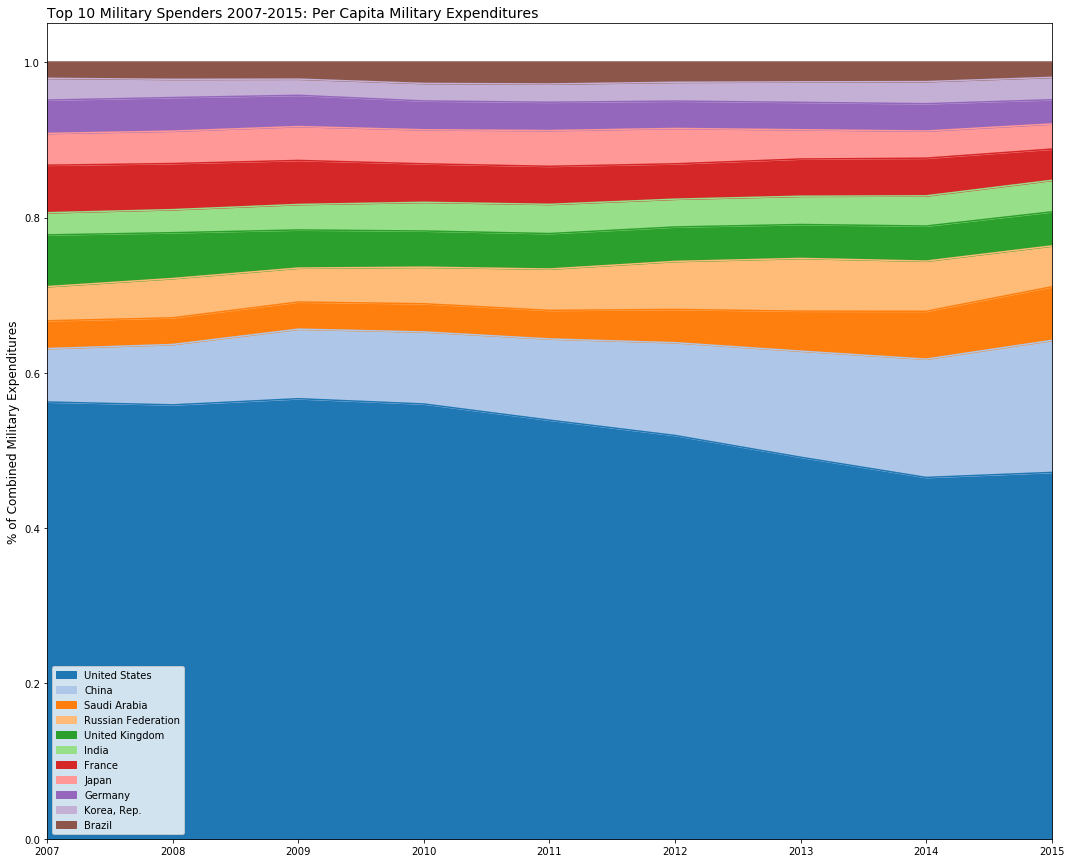

In [222]:
# military expenditure as % of GDP
miliDataList[4].T.plot.area(figsize=(18,15),color=tableau20)
pp.ylabel('% of Combined Military Expenditures',size=12)
pp.legend(loc='best',fontsize=10)
pp.title("Top 10 Military Spenders 2007-2015: Per Capita Military Expenditures",
         loc='left',fontsize=14)

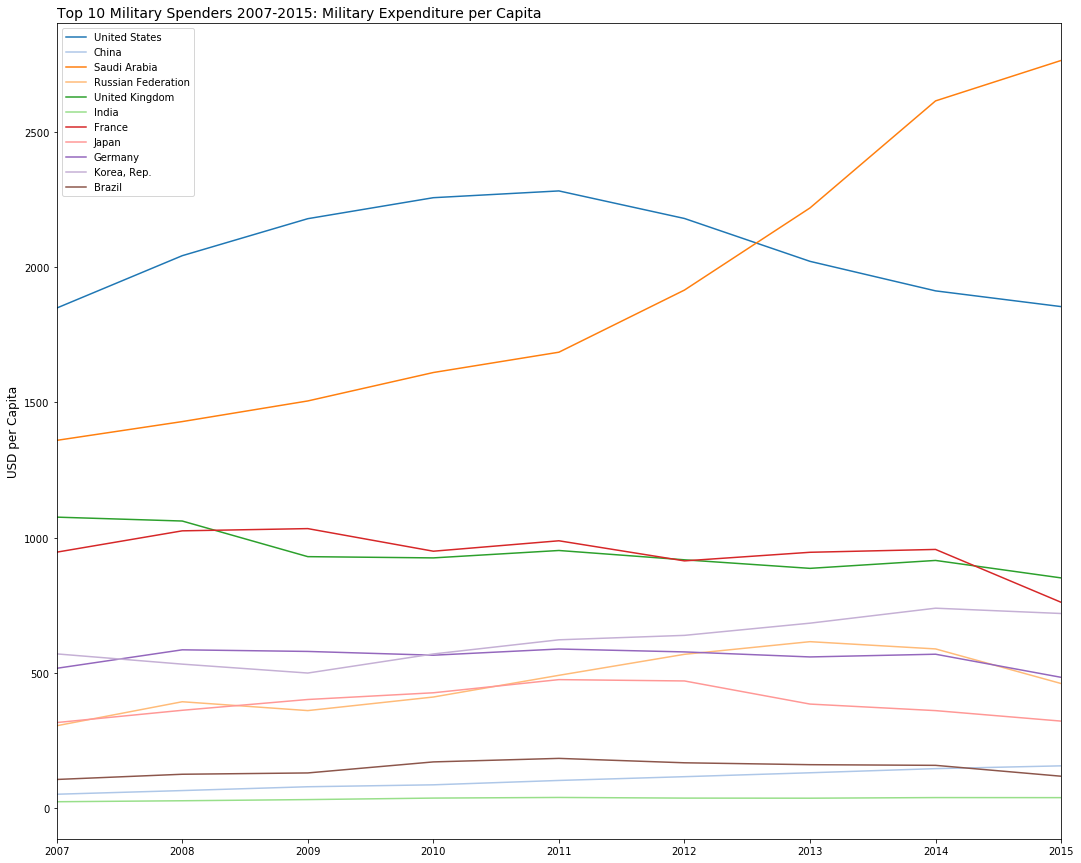

In [223]:
# military expenditure as % of GDP
miliDataList[5].T.plot(figsize=(18,15),color=tableau20)
pp.ylabel('USD per Capita',size=12)
pp.legend(loc='best',fontsize=10)
pp.title("Top 10 Military Spenders 2007-2015: Military Expenditure per Capita",
         loc='left',fontsize=14)

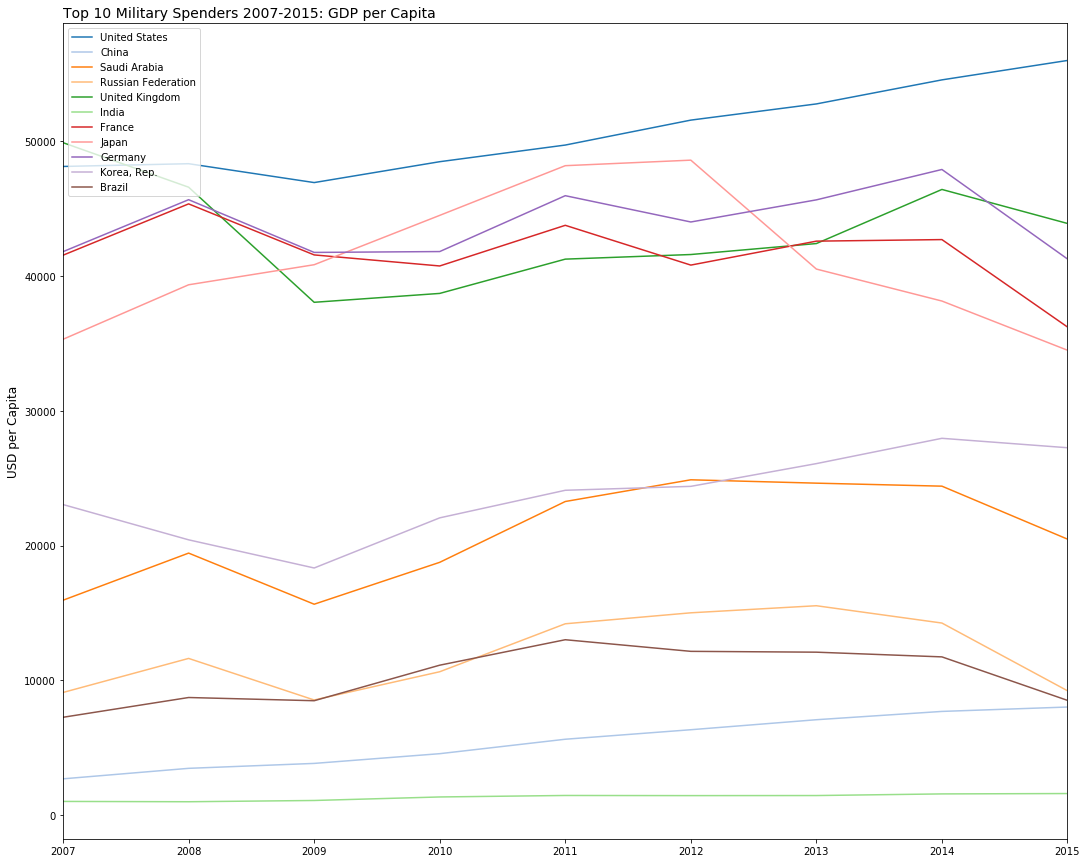

In [227]:
# military expenditure as % of GDP
miliDataList[6].T.plot(figsize=(18,15),color=tableau20)
pp.ylabel('USD per Capita',size=12)
pp.legend(loc='upper left',fontsize=10)
pp.title("Top 10 Military Spenders 2007-2015: GDP per Capita",
         loc='left',fontsize=14)

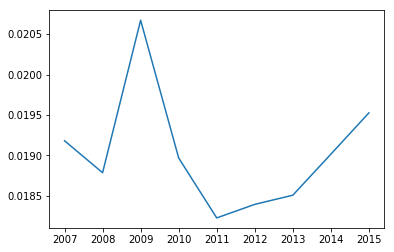

In [276]:
miliDataList[3].index.values.tolist()[1]

'China'

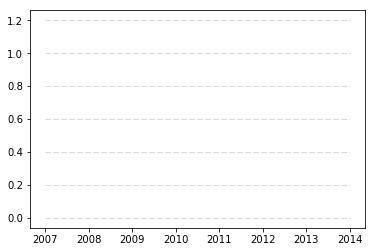

In [323]:
for y in [x * 0.1 for x in range(0,14,2)]:
    print(y)

0.0
0.2
0.4
0.6000000000000001
0.8
1.0
1.2000000000000002
